In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import pyforest

In [4]:
movies=pd.read_csv('my_movies.csv')
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [5]:
mv=movies.iloc[:,5:]
mv

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [6]:
# using apriori for determing support of itemsets (with min_support=0.1)
movie_itemsets1 = apriori(mv, min_support=0.1, use_colnames=True)
movie_itemsets1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [7]:
# rules with min confidence of 0.9
confi_rules = association_rules(movie_itemsets1, metric="confidence", min_threshold=0.9)
confi_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
3,(LOTR),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
4,(Braveheart),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
...,...,...,...,...,...,...,...,...,...
120,"(Harry Potter1, LOTR2)","(LOTR1, Sixth Sense, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
121,"(LOTR2, Green Mile)","(Harry Potter1, LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
122,"(LOTR1, Harry Potter1)","(Sixth Sense, LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
123,"(LOTR1, Green Mile)","(Harry Potter1, Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf


In [8]:
# Finding association rules wiht threshold of 0.8
rules1 = association_rules(movie_itemsets1, metric="lift", min_threshold=0.8)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
241,(Sixth Sense),"(LOTR1, Harry Potter1, LOTR2, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
242,(LOTR2),"(Harry Potter1, LOTR1, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
243,(LOTR1),"(Harry Potter1, Sixth Sense, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
244,(Harry Potter1),"(LOTR1, Sixth Sense, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [9]:
# Sorting the association rules with heighest lift ratio for top 10
rules1.sort_values('lift',ascending = False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
208,"(LOTR1, Green Mile)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
103,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
209,"(Harry Potter1, LOTR2)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
165,"(Harry Potter1, Sixth Sense)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
133,"(Gladiator, Sixth Sense, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
206,"(LOTR1, Harry Potter1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
138,"(Gladiator, Green Mile)","(Sixth Sense, LOTR)",0.1,0.1,0.1,1.0,10.0,0.09,inf
139,"(Sixth Sense, LOTR)","(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
144,(LOTR),"(Gladiator, Sixth Sense, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
197,"(LOTR2, Green Mile)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [10]:
# Gathering the most effictive rules which have lift ratio greater than 1
r1=rules1[rules1.lift>1]
r1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
241,(Sixth Sense),"(LOTR1, Harry Potter1, LOTR2, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
242,(LOTR2),"(Harry Potter1, LOTR1, Sixth Sense, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
243,(LOTR1),"(Harry Potter1, Sixth Sense, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
244,(Harry Potter1),"(LOTR1, Sixth Sense, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [11]:
l=r1.pivot('antecedents','consequents','lift')
l.head()

consequents,(Sixth Sense),"(LOTR2, Green Mile)","(LOTR, Green Mile)","(Braveheart, Patriot)","(Gladiator, Braveheart)","(LOTR1, LOTR2)","(Sixth Sense, LOTR, Green Mile)","(Gladiator, LOTR, Green Mile)","(Gladiator, Sixth Sense, Green Mile)","(LOTR1, Sixth Sense, LOTR2, Green Mile)",...,"(Gladiator, Green Mile)","(LOTR1, Sixth Sense)","(Harry Potter1, Sixth Sense)","(Harry Potter1, LOTR1)","(Harry Potter1, LOTR2, Green Mile)","(LOTR1, Harry Potter1, LOTR2, Green Mile)","(Sixth Sense, LOTR2)","(Harry Potter1, Sixth Sense, LOTR2, Green Mile)","(Sixth Sense, Patriot)","(Harry Potter1, LOTR1, Sixth Sense, LOTR2)"
antecedents,,,,,,,,,,,,,,,,,,,,,
(Gladiator),1.190476,NaN,1.428571,1.428571,NaN,NaN,1.428571,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.428571,NaN
"(LOTR, Green Mile)",1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Gladiator, Braveheart)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Braveheart, Patriot)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(LOTR1, LOTR2)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5, 34.5, 36.5, 38.5, 40.5, 42.5,
        44.5, 46.5]),
 [Text(0.5, 0, "frozenset({'Sixth Sense'})"),
  Text(2.5, 0, "frozenset({'LOTR', 'Green Mile'})"),
  Text(4.5, 0, "frozenset({'Gladiator', 'Braveheart'})"),
  Text(6.5, 0, "frozenset({'Sixth Sense', 'LOTR', 'Green Mile'})"),
  Text(8.5, 0, "frozenset({'Gladiator', 'Sixth Sense', 'Green Mile'})"),
  Text(10.5, 0, "frozenset({'Gladiator', 'Sixth Sense', 'LOTR'})"),
  Text(12.5, 0, "frozenset({'Harry Potter1', 'Sixth Sense', 'LOTR2'})"),
  Text(14.5, 0, "frozenset({'Harry Potter1', 'Sixth Sense', 'LOTR1'})"),
  Text(16.5, 0, "frozenset({'LOTR1', 'Sixth Sense', 'Green Mile'})"),
  Text(18.5, 0, "frozenset({'LOTR1', 'LOTR2', 'Green Mile'})"),
  Text(20.5, 0, "frozenset({'Harry Potter1', 'LOTR2'})"),
  Text(22.5, 0, "frozenset({'Sixth Sense', 'Green Mile'})"),
  Text(24.5, 0, "frozenset({'Gladiator'})"),
  Text(26.5, 0, "fro

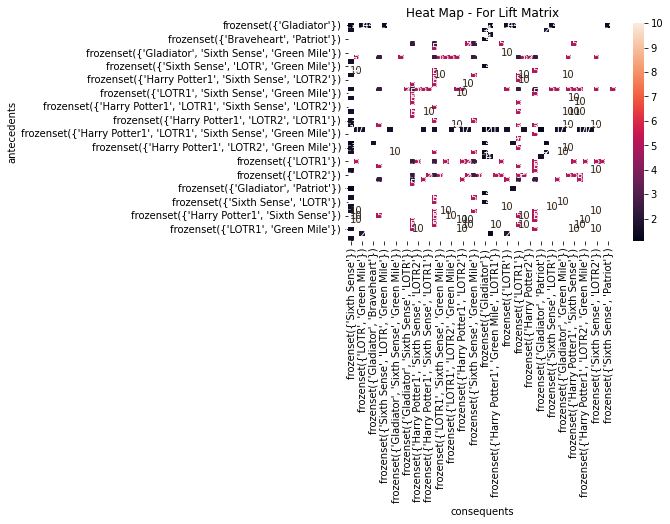

In [12]:
# Vizualising rules with Heatmap for lift ratio
sns.heatmap(l,annot = True)
plt.title('Heat Map - For Lift Matrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'support vs confidence')

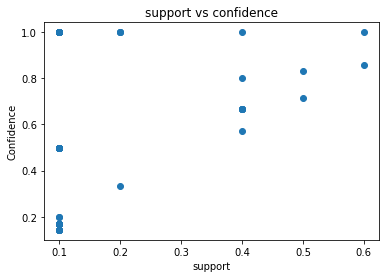

In [13]:
# Scatter plot for the associatioin rules with their confidence vs support 
sup=r1['support']
con=r1['confidence']
plt.scatter(sup,con)
plt.xlabel('support')
plt.ylabel('Confidence')
plt.title('support vs confidence')

In [16]:
#Association rules with support=0.15 and threshold=0.85 for whole dataset
movie_itemsets2 = apriori(mv, min_support=0.15, use_colnames=True)
movie_itemsets2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Sixth Sense, Patriot)"
9,0.2,"(Sixth Sense, Green Mile)"


In [17]:
rules2 = association_rules(movie_itemsets2, metric="lift", min_threshold=0.85)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


In [18]:
r2=rules2[rules2.lift>1]
r2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


In [19]:
mv2=mv.head()
mv2

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [20]:
movie_itemsets3 = apriori(mv2, min_support=0.2, use_colnames=True)
movie_itemsets3

,support,itemsets
0,0.6,(Sixth Sense)
1,0.6,(Gladiator)
2,0.4,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.4,(LOTR2)
6,0.2,(Braveheart)
7,0.2,(Green Mile)
8,0.4,"(Gladiator, Sixth Sense)"
9,0.2,"(LOTR1, Sixth Sense)"


In [21]:
rules3 = association_rules(movie_itemsets3, metric="lift", min_threshold=0.95)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
1,(Sixth Sense),(Gladiator),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
2,(Harry Potter1),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
3,(Sixth Sense),(Harry Potter1),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
191,(Sixth Sense),"(LOTR1, Harry Potter1, LOTR2, Green Mile)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
192,(LOTR2),"(Harry Potter1, LOTR1, Sixth Sense, Green Mile)",0.4,0.2,0.2,0.500000,2.500000,0.12,1.6
193,(LOTR1),"(Harry Potter1, Sixth Sense, LOTR2, Green Mile)",0.4,0.2,0.2,0.500000,2.500000,0.12,1.6
194,(Harry Potter1),"(LOTR1, Sixth Sense, LOTR2, Green Mile)",0.2,0.2,0.2,1.000000,5.000000,0.16,inf


In [22]:
r3=rules3[rules3.lift>1]
r3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
1,(Sixth Sense),(Gladiator),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
2,(Harry Potter1),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
3,(Sixth Sense),(Harry Potter1),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
191,(Sixth Sense),"(LOTR1, Harry Potter1, LOTR2, Green Mile)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
192,(LOTR2),"(Harry Potter1, LOTR1, Sixth Sense, Green Mile)",0.4,0.2,0.2,0.500000,2.500000,0.12,1.6
193,(LOTR1),"(Harry Potter1, Sixth Sense, LOTR2, Green Mile)",0.4,0.2,0.2,0.500000,2.500000,0.12,1.6
194,(Harry Potter1),"(LOTR1, Sixth Sense, LOTR2, Green Mile)",0.2,0.2,0.2,1.000000,5.000000,0.16,inf
